In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from matplotlib.font_manager import FontProperties
import pandas as pd
from astropy.io import fits
from math import pi

In [2]:
# define a few constants
from math import pi as PI
solarlum = 3.828e+26
SOLARLUM = 3.828e+26
DISTSGRAM = 2.523449542502775e+20
CKMS = 299792.0
SCALE = 1e-26*4*PI*DISTSGRAM**2/SOLARLUM*1e9

In [3]:
# load the table
data = pd.read_csv('SGRA_FLUX_FREQ.csv')
display(data)

ref               instru           mjd          freq  \
0        Falcke et al. 1998                 IRAM  50383.000000  2.356000e+02   
1        Falcke et al. 1998                 IRAM  50383.000000  1.523000e+02   
2        Falcke et al. 1998        IRAM+Nobeyama  50383.000000  1.510000e+02   
3        Falcke et al. 1998             Nobeyama  50383.000000  1.500000e+02   
4        Falcke et al. 1998                 IRAM  50383.000000  1.063000e+02   
5        Falcke et al. 1998  IRAMa+Nobeyama+BIMA  50383.000000  9.500000e+01   
6        Falcke et al. 1998             Nobeyama  50383.000000  9.500000e+01   
7        Falcke et al. 1998                 BIMA  50383.000000  9.300000e+01   
8        Falcke et al. 1998                  VLA  50383.000000  4.330000e+01   
9        Falcke et al. 1998                  VLA  50383.000000  2.250000e+01   
10       Falcke et al. 1998                  VLA  50383.000000  1.490000e+01   
11       Falcke et al. 1998                  VLA  50383.000000  8.450000e+00   
12       Falcke et al. 1998                  VLA  50383.000000  4.850000e+00   
13       Falcke et al. 1998                  VLA  50383.000000  1.640000e+00   
14       Falcke et al. 1998                  VLA  50383.000000  1.440000e+00   
15       Falcke et al. 1998                  VLA  50383.000000  1.360000e+00   
16               Zylka 1995                  NaN           NaN  2.306090e+02   
17               Zylka 1995                  NaN           NaN  3.747400e+02   
18               Zylka 1995                  NaN           NaN  4.996530e+02   
19               Zylka 1995                  NaN           NaN  6.662040e+02   
20   Brinkerink et al. 2015                 VLBA      6.602162  1.000000e+02   
21   Brinkerink et al. 2015                 VLBA      6.922162  1.000000e+02   
22   Brinkerink et al. 2015                 VLBA      7.237838  1.000000e+02   
23   Brinkerink et al. 2015                 VLBA      7.895135  1.000000e+02   
24   Brinkerink et al. 2015                 VLBA      8.210811  1.000000e+02   
25   Brinkerink et al. 2015                 VLBA      8.500541  1.000000e+02   
26   Brinkerink et al. 2015                 VLBA      8.790270  1.000000e+02   
27   Brinkerink et al. 2015                 VLBA      9.080000  1.000000e+02   
28   Brinkerink et al. 2015                 VLBA      9.711351  1.000000e+02   
29   Brinkerink et al. 2015                 VLBA     10.001081  1.000000e+02   
..                      ...                  ...           ...           ...   
485        Yuan et al. 2003                  NaN           NaN  2.026021e+06   
486        Yuan et al. 2003                  NaN           NaN  2.370211e+06   
487        Yuan et al. 2003                  NaN           NaN  3.180939e+06   
488        Yuan et al. 2003                  NaN           NaN  6.076390e+06   
489        Yuan et al. 2003                  NaN           NaN  8.316333e+06   
490        Yuan et al. 2003                  NaN           NaN  1.280340e+07   
491        Yuan et al. 2003                  NaN           NaN  1.557773e+07   
492        Yuan et al. 2003                  NaN           NaN  2.050004e+07   
493        Yuan et al. 2003                  NaN           NaN  3.218593e+07   
494        Yuan et al. 2003                  NaN           NaN  3.993584e+07   
495        Yuan et al. 2003                  NaN           NaN  5.053328e+07   
496        Yuan et al. 2003                  NaN           NaN  6.270097e+07   
497        Yuan et al. 2003                  NaN           NaN  8.414777e+07   
498        Yuan et al. 2003                  NaN           NaN  1.607433e+08   
499        Yuan et al. 2003                  NaN           NaN  3.321198e+08   
500        Yuan et al. 2003                  NaN           NaN  4.635524e+08   
501        Yuan et al. 2003                  NaN           NaN  6.469979e+08   
502        Yuan et al. 2003                  NaN           NaN  7.569131e+08   
503        Yuan et al. 2

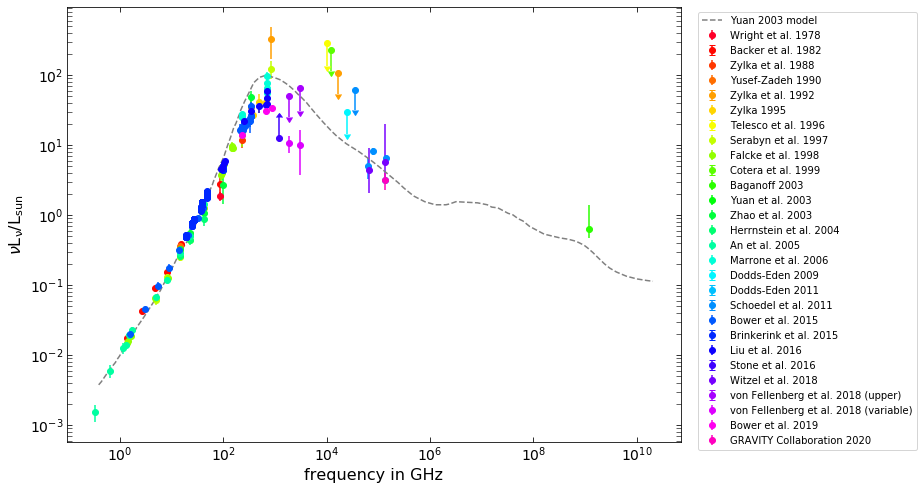

In [4]:
refs = list(set(data.ref))
nrefs = len(refs)
pub_years = [int([r for r in ref.split() if r.isdigit()][0]) for ref in refs]
refs = [ref for _x,ref in sorted(zip(pub_years,refs))]

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=nrefs-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

fontP = FontProperties()
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(nrefs)])
for i, ref in enumerate(refs):
  flt = (data.ref == ref)&(data.obs==True)
  plt.errorbar(data[flt].freq, data[flt].flux*SCALE*data[flt].freq,
               yerr=[data[flt].lerr*SCALE*data[flt].freq, data[flt].uerr*SCALE*data[flt].freq], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label=ref)

# load the model predictions
flt = data.obs == False
plt.plot(data[flt].freq, data[flt].flux*SCALE*data[flt].freq, color='grey', linestyle='--', alpha=1, label='Yuan 2003 model')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("frequency in GHz", fontsize = 16)
plt.ylabel(r'$\nu\rm{L}_{\nu}/ \rm{L}_{\rm{sun}}$', fontsize = 16)
plt.tick_params(which ='both',direction='in', bottom=1, top=1, left=1, right=1, length = 5, labelsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', prop=fontP, frameon=True)
plt.xscale('log')
plt.yscale('log')
plt.savefig("SED_SgrA.pdf",bbox_inches='tight', format='pdf')
plt.show()

['Wright et al. 1978', 'Backer et al. 1982', 'Zylka et al. 1988', 'Yusef-Zadeh 1990', 'Zylka et al. 1992', 'Zylka 1995', 'Telesco et al. 1996', 'Serabyn et al. 1997', 'Falcke et al. 1998', 'Cotera et al. 1999', 'Baganoff 2003', 'Yuan et al. 2003', 'Zhao et al. 2003', 'Herrnstein et al. 2004', 'An et al. 2005', 'Marrone et al. 2006', 'Dodds-Eden 2009', 'Dodds-Eden 2011', 'Schoedel et al. 2011', 'Bower et al. 2015', 'Brinkerink et al. 2015', 'Liu et al. 2016', 'Stone et al. 2016', 'Witzel et al. 2018', 'von Fellenberg et al. 2018 (upper)', 'von Fellenberg et al. 2018 (variable)', 'Bower et al. 2019', 'GRAVITY Collaboration 2020']


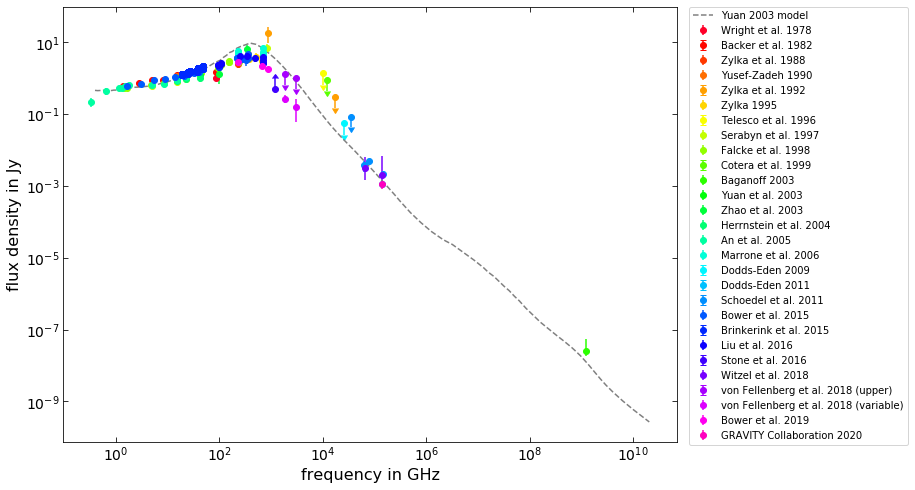

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(nrefs)])
print(refs)
for i, ref in enumerate(refs):
  flt = (data.ref == ref)&(data.obs==True)
  plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label=ref)
  
# load the model predictions
flt = data.obs == False
plt.plot(data[flt].freq, data[flt].flux, color='grey', linestyle='--', alpha=1, label='Yuan 2003 model')

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=True)
plt.xlabel("frequency in GHz", fontsize = 16)
plt.ylabel("flux density in Jy", fontsize = 16)
plt.tick_params(which ='both',direction='in', bottom=1, top=1, left=1, right=1, length = 5, labelsize=14)
plt.xscale('log')
plt.yscale('log')
plt.savefig("flux_density_SED_SgrA.pdf",bbox_inches='tight', format='pdf')
plt.show()

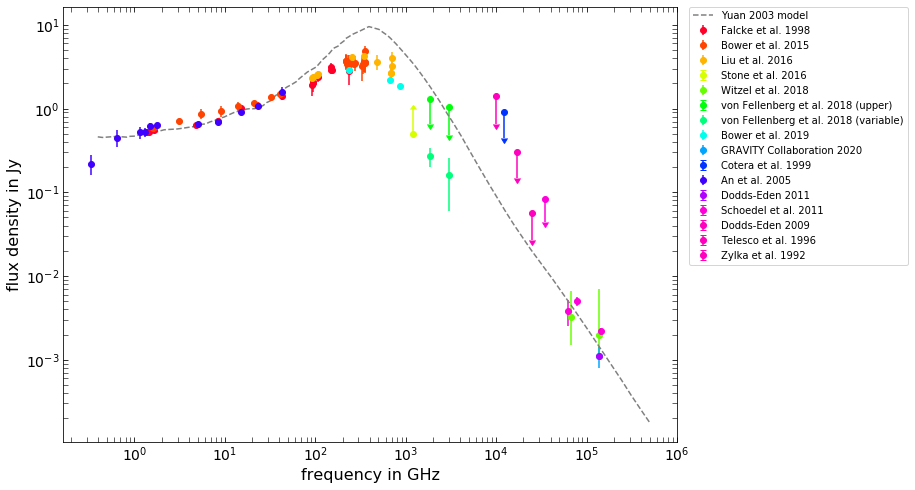

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

refs = ['Falcke et al. 1998','Bower et al. 2015','Liu et al. 2016', 'Stone et al. 2016', \
        'Witzel et al. 2018', 'von Fellenberg et al. 2018 (upper)', 'von Fellenberg et al. 2018 (variable)', \
        'Bower et al. 2019', 'GRAVITY Collaboration 2020','Cotera et al. 1999','An et al. 2005','Dodds-Eden 2011', \
        'Schoedel et al. 2011','Dodds-Eden 2009','Telesco et al. 1996']
nrefs = len(refs)+1

ax.set_prop_cycle(color=[scalarMap.to_rgba(2.2*i) for i in range(nrefs)])
pub_years = np.array(pub_years)

for i, ref in enumerate(refs):
  flt = (data.ref == ref)&(data.obs==True)
  plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label=ref)
  
flt = (data.ref == "Zylka et al. 1992")&(data.obs==True)&(np.isnan(data.uerr))
plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label="Zylka et al. 1992")

# load the model predictions
flt = data.obs == False
plt.plot(data[flt].freq[:100], data[flt].flux[:100], color='grey', linestyle='--', alpha=1, label='Yuan 2003 model')

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=True)
plt.xlabel("frequency in GHz", fontsize = 16)
plt.ylabel("flux density in Jy", fontsize = 16)
plt.tick_params(which ='both',direction='in', bottom=1, top=1, left=1, right=1, length = 5, labelsize=14)
plt.xscale('log')
plt.yscale('log')
plt.savefig("flux_density_SED_SgrA.pdf",bbox_inches='tight', format='pdf')
plt.show()

In [7]:
def bindata_log(x, y, dy, xmin=0, xmax=1e3, nbin=7):
  bx, by, dbx, dby = [], [], [], []
  if xmin == 0:
    xmin = x.min()
  if xmax==0:
    xmax = x.max()
  bins = np.logspace(np.log10(xmin), np.log10(xmax), nbin+1)
  for i in range(nbin):
    flg = (x>=bins[i])&(x<bins[i+1])
    if len(x[flg]) > 0:
      bx.append(x[flg].mean())
      dbx.append(x[flg].std())
      by.append(np.average(y[flg], weights=dy[flg]**-2.0))
      dby.append(np.sqrt(np.cov(y[flg], aweights=dy[flg]**-2.0)))

  bx = np.asarray(bx)
  dbx = np.asarray(dbx)
  by = np.asarray(by)
  dby = np.asarray(dby)
  
  return bx, by, dbx, dby

In [8]:
path = '/Users/gw/Spitzer/sgra_ps/'
M_quant = np.genfromtxt(path + 'M_quantiles.txt')
K_quant = np.genfromtxt(path + 'K_quantiles.txt')

In [9]:
freq_M = CKMS/M_quant[:,0]/1.e3
freq_K = CKMS/K_quant[:,0]/1.e3
flux_M = M_quant[:,2] * 10.**(0.4*1.0)/1000.
flux_K = K_quant[:,2] * 10.**(0.4*2.46)/1000.
lum_M = M_quant[:,3]
lum_K = K_quant[:,3]

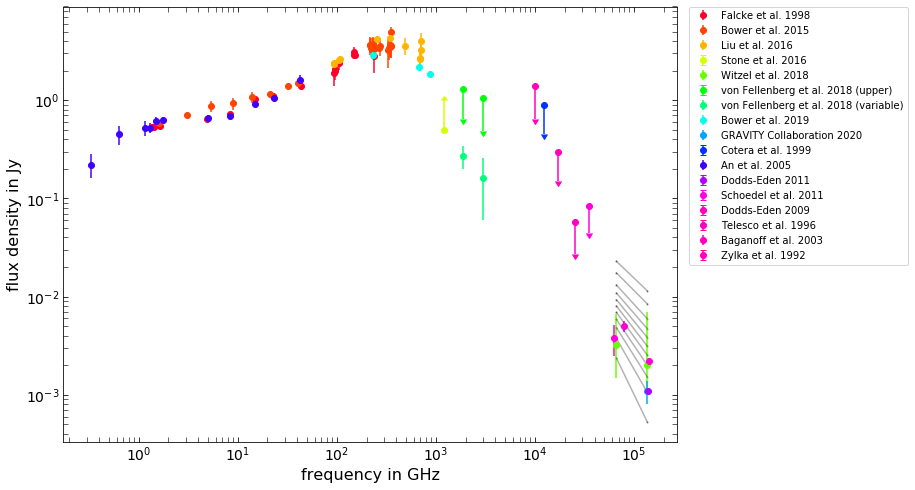

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

refs = ['Falcke et al. 1998','Bower et al. 2015','Liu et al. 2016', 'Stone et al. 2016', \
        'Witzel et al. 2018', 'von Fellenberg et al. 2018 (upper)', 'von Fellenberg et al. 2018 (variable)', \
        'Bower et al. 2019', 'GRAVITY Collaboration 2020','Cotera et al. 1999','An et al. 2005','Dodds-Eden 2011', \
        'Schoedel et al. 2011','Dodds-Eden 2009','Telesco et al. 1996', 'Baganoff et al. 2003']
nrefs = len(refs)+1

ax.set_prop_cycle(color=[scalarMap.to_rgba(2.2*i) for i in range(nrefs)])
pub_years = np.array(pub_years)

for i, ref in enumerate(refs):
  flt = (data.ref == ref)&(data.obs==True)
  plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label=ref)
  
flt = (data.ref == "Zylka et al. 1992")&(data.obs==True)&(np.isnan(data.uerr))
plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label="Zylka et al. 1992")

# load the model predictions
#flt = data.obs == False
#plt.plot(data[flt].freq[:100], data[flt].flux[:100], color='grey', linestyle='--', alpha=1, label='Yuan 2003 model')

plt.scatter(freq_M, flux_M, color = 'black', s = 1.5, alpha = 0.3)
plt.scatter(freq_K, flux_K, color = 'black', s = 1.5, alpha = 0.3)
for i in range(11):
    plt.plot([freq_M[i],freq_K[i]], [flux_M[i],flux_K[i]], color = 'black', alpha = 0.3)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=True)
plt.xlabel("frequency in GHz", fontsize = 16)
plt.ylabel("flux density in Jy", fontsize = 16)
plt.tick_params(which ='both',direction='in', bottom=1, top=1, left=1, right=1, length = 5, labelsize=14)
plt.xscale('log')
plt.yscale('log')
#plt.savefig("flux_density_SED_SgrA.pdf",bbox_inches='tight', format='pdf')
plt.show()

In [11]:
refs0 = ['Falcke et al. 1998','Bower et al. 2015','Liu et al. 2016', \
        'Bower et al. 2019','An et al. 2005']

flt0 = np.zeros(len(data), dtype=bool)
for i, ref in enumerate(refs0):
    flt0 = flt0|(data.ref == ref)
bx, by, dbx, dby = bindata_log(data[flt0].freq, data[flt0].flux, data[flt0].lerr, nbin = 10)
print(bx.shape)

refs1 = ['Witzel et al. 2018', 'Schoedel et al. 2011', 'GRAVITY Collaboration 2020']

flt1 = np.zeros(len(data), dtype=bool)
for i, ref in enumerate(refs1):
    flt1 = flt1|(data.ref == ref)
print(max(flt1))
bx1, by1, dbx1, dby1 = bindata_log(data[flt1].freq, data[flt1].flux, data[flt1].lerr, nbin = 2,xmin=35859., xmax = 200000.)
print(bx1.shape)

(10,)
True
(2,)


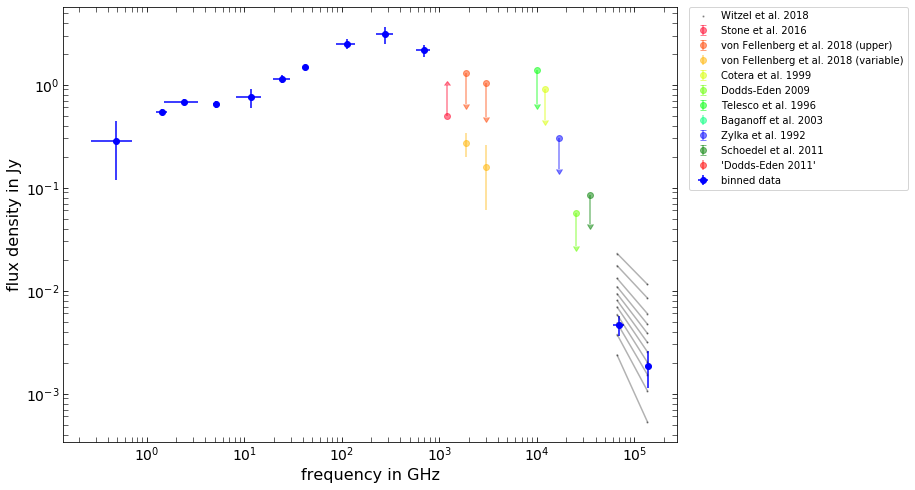

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

refs = [ 'Stone et al. 2016', \
         'von Fellenberg et al. 2018 (upper)', 'von Fellenberg et al. 2018 (variable)', \
         'Cotera et al. 1999', \
        'Dodds-Eden 2009','Telesco et al. 1996', 'Baganoff et al. 2003']
nrefs = len(refs)+1

ax.set_prop_cycle(color=[scalarMap.to_rgba(2.2*i) for i in range(nrefs)])
pub_years = np.array(pub_years)

for i, ref in enumerate(refs):
    flt = (data.ref == ref)&(data.obs==True)
    plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label=ref, alpha = 0.5)
  
flt = (data.ref == "Zylka et al. 1992")&(data.obs==True)&(np.isnan(data.uerr))
plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label="Zylka et al. 1992", color = 'blue', alpha = 0.5)

flt = (data.ref == "Schoedel et al. 2011")&(data.obs==True)&(np.isnan(data.uerr))
plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label="Schoedel et al. 2011", color = 'green', alpha = 0.5)

flt = (data.ref == "'Dodds-Eden 2011'")&(data.obs==True)&(np.isnan(data.uerr))
plt.errorbar(data[flt].freq, data[flt].flux,
               yerr=[data[flt].lerr, data[flt].uerr], 
               lolims=np.isnan(data[flt].lerr), 
               uplims=np.isnan(data[flt].uerr), 
               ls='none', capsize=0, ms=6, marker='o', label="'Dodds-Eden 2011'", color = 'red', alpha = 0.5)

# load the model predictions
#flt = data.obs == False
#plt.plot(data[flt].freq[:100], data[flt].flux[:100], color='grey', linestyle='--', alpha=1, label='Yuan 2003 model')

plt.errorbar(bx, by, xerr = dbx, yerr = dby, 
               ls='none', capsize=0, ms=6, marker='o', label="binned data", color ='blue')

plt.errorbar(bx1, by1, xerr = dbx1, yerr = dby1, 
               ls='none', capsize=0, ms=6, marker='o', color ='blue')

plt.scatter(freq_M, flux_M, color = 'black', s = 1.5, alpha = 0.3)
plt.scatter(freq_K, flux_K, color = 'black', s = 1.5, alpha = 0.3, label = 'Witzel et al. 2018')
for i in range(11):
    plt.plot([freq_M[i],freq_K[i]], [flux_M[i],flux_K[i]], color = 'black', alpha = 0.3)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=True)
plt.xlabel("frequency in GHz", fontsize = 16)
plt.ylabel("flux density in Jy", fontsize = 16)
plt.tick_params(which ='both',direction='in', bottom=1, top=1, left=1, right=1, length = 5, labelsize=14)
plt.xscale('log')
plt.yscale('log')
plt.savefig("flux_density_SED_SgrA_binned.pdf",bbox_inches='tight', format='pdf')
plt.show()

In [13]:
hdul = fits.open('potential.fits')
potential = hdul[0].data
hdul.close()
print(potential.shape)

(200000, 46)


In [14]:
print(np.median(potential[:,0]))
print(np.median(potential[:,3]))

4.26213063010867
8.248478600522091


In [15]:
mass = np.array(potential[:,0])
D = np.array(potential[:,3])
print(D[1100])
G = 6.67408e-11
c = 299792458.
kpctom = 3.085677581e19
solarMtokg = 1.98847e30
radtouas = 180./pi*60.*60.*1.e6
angularsize_rad = G* mass * 1.e6 * solarMtokg / c**2. / (D*kpctom)
print(angularsize_rad * radtouas)


8.248882166439945
[5.10034303 5.09659533 5.09659533 ... 5.09547852 5.09646265 5.09554805]


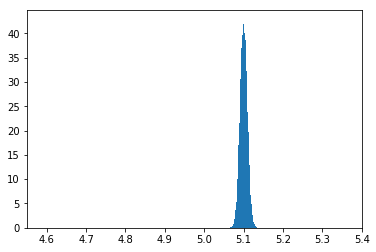

In [16]:
plt.hist(angularsize_rad * radtouas, bins = 50, density = True)
plt.xlim(4.55,5.4)
plt.savefig("Sgr_angukar_size_GRAVITY.png",bbox_inches='tight', format='png')
plt.show()

In [17]:
print(np.median(angularsize_rad * radtouas))
print(np.std(angularsize_rad * radtouas))

5.100285853413435
0.009304260275950956


In [18]:
chain = np.genfromtxt('/Users/gw/SED_demo/posterior_chains_data/chains_GR.txt')
print(chain.shape)

(31829, 18)


In [19]:
def weighted_percentile(data, percents, weights=None):
    ''' percents
        weights specifies the frequency (count) of data.
        '''
    if weights is None:
        return np.percentile(data, 100*percents)
    ind=np.argsort(data)
    d=data[ind]
    w=weights[ind]
    p=1.*w.cumsum()/w.sum()
    y=np.interp(percents, p, d)

    return y

In [20]:
angularsize_rad_UCLA = chain[:,1]*solarMtokg*G*1.e6/(chain[:,2]*kpctom*c**2)
print(angularsize_rad_UCLA * radtouas)
print(weighted_percentile(angularsize_rad_UCLA * radtouas, 0.5, weights = chain[:,0]))
print(weighted_percentile(angularsize_rad_UCLA * radtouas, 0.16)- weighted_percentile(angularsize_rad_UCLA * radtouas, 0.5))
print(weighted_percentile(angularsize_rad_UCLA * radtouas, 0.84) - weighted_percentile(angularsize_rad_UCLA * radtouas, 0.5))

[4.96443099 5.19014154 5.06195702 ... 4.91715508 4.90999753 4.8968356 ]
4.915008745524067
-0.05727121598659579
0.06589507393275262


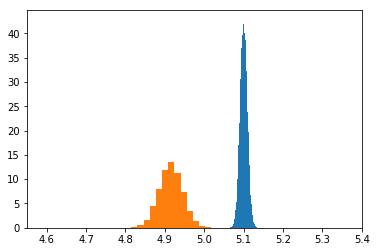

In [21]:
plt.hist(angularsize_rad * radtouas, bins = 50, density = True)
plt.hist(angularsize_rad_UCLA * radtouas, bins = 50, density = True, weights = chain[:,0])
plt.xlim(4.55,5.4)
plt.savefig("Sgr_angukar_size_comp.png",bbox_inches='tight', format='png')
plt.show()

In [22]:
print(4.915008745524067+3*0.06589507393275262)

5.112693967322325
